equation : 10.199697360926551*exp(-(x-399.0553970502764)**2/(2*2.9601030956977917e-05**2)-((y-598.6342034506614)**2)/(2*(-7.529057283885028e-07)**2) 

peak : 10.199697360926551


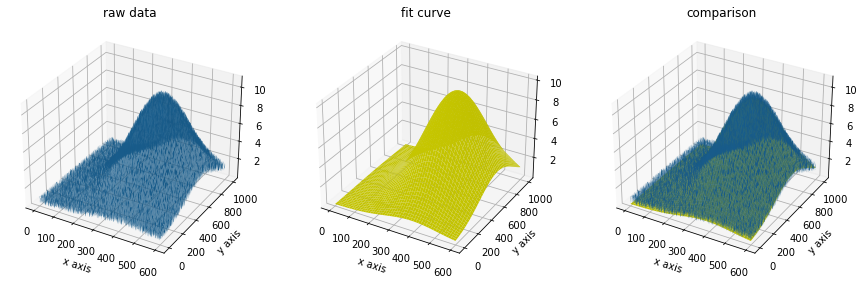

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
%matplotlib inline

class Gaussian:
    
    def main(self, data):
        
#       load_data()
#       self.show_raw_data()
#       self.show_fit_result(fitvalue, pred_params)
        self.data = data
        fitvalue, pred_params, uncert_cov = self.fit_2d_gaussian()
        self.show_img(fitvalue, pred_params)

        
    def load_data(self):
        self.data=np.load('/Users/chiaentsai/Desktop/lab/gaussian/bigaussian.npy')


    def gauss2d(self, data_tuple, amp, x0, y0, a, b, c):

        (x,y) = data_tuple    
        inner = a * (x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2
        inner = -inner
        g = amp*np.exp(inner)
        return g

    def fit_2d_gaussian(self):

        
        ynum,xnum = data.shape
        self.xaxis, self.yaxis = np.meshgrid(range(xnum),range(ynum))

        y_maxs = np.max(self.data,1)
        x_maxs = np.max(self.data,0)
        max_index_y = np.argmax(y_maxs)
        max_index_x = np.argmax(x_maxs)

        xdata = np.vstack((self.xaxis.ravel(),self.yaxis.ravel()))
        ydata = data.ravel()

        pred_params, uncert_cov = curve_fit(self.gauss2d,xdata,ydata,p0=[x_maxs.max(),max_index_x,max_index_y,0,0,0],
                                            maxfev=20000)

        fitvalue=self.gauss2d((self.xaxis, self.yaxis), pred_params[0], pred_params[1], pred_params[2], pred_params[3], 
                     pred_params[4], pred_params[5])
        
        return fitvalue, pred_params, uncert_cov

    def show_fit_result(self, fitvalue, pred_params):
             

        fig1=plt.gca(projection='3d')
        fig1.plot_surface(self.xaxis, self.yaxis, fitvalue,color="yellow")
        print('equation : '+f'{pred_params[0]}*exp(-(x-{pred_params[1]})**2/(2*{pred_params[3]}**2)-((y-{pred_params[2]})**2)/(2*({pred_params[4]})**2)','\n')
        print('peak :',pred_params[0])
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('fit curve')


    def show_raw_data(self):
        
        fig=plt.subplot(122)
        fig2=plt.gca(projection='3d')
        fig2.plot_surface(self.xaxis, self.yaxis, self.data)
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('raw data')
        
    def show_img(self, fitvalue, pred_params):
        
        fig=plt.figure(figsize=(15, 15))
        fig1=fig.add_subplot(131, projection='3d')
        fig1.plot_surface(self.xaxis, self.yaxis, self.data)
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('raw data')
        
        fig2 = fig.add_subplot(132, projection='3d')
        fig2.plot_surface(self.xaxis, self.yaxis, fitvalue, color="yellow")
        print('equation : '+f'{pred_params[0]}*exp(-(x-{pred_params[1]})**2/(2*{pred_params[3]}**2)-((y-{pred_params[2]})**2)/(2*({pred_params[4]})**2)','\n')
        print('peak :',pred_params[0])
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('fit curve')
        
        fig3 = fig.add_subplot(133, projection='3d')
        fig3.plot_surface(self.xaxis, self.yaxis, self.data)
        fig3.plot_surface(self.xaxis, self.yaxis, fitvalue, color="yellow")
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('comparison')
        
data = np.load('/Users/chiaentsai/Desktop/lab/gaussian/bigaussian.npy')


a = Gaussian()
a.main(data)